In [1]:
# %load simulations
from TreeClassifier import *
from TreeClassifierWithBias import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn import svm
import numpy as np
import datetime
import os

In [2]:
def generate_data(n,d,planes=3):
    X = np.random.normal(size=[n, d])
    row_squared_sums = np.reshape(np.sqrt(np.square(X).sum(axis=1)), (-1, 1))
    X = np.divide(X, row_squared_sums)
    w = np.random.normal(size=[planes, d])
    row_squared_sums = np.reshape(np.sqrt(np.square(w).sum(axis=1)), (-1, 1))
    w = np.divide(w, row_squared_sums)
    w = np.transpose(w)
    y = np.dot(X,w)
    y = np.prod(y,axis=1)
    y = np.greater(y,0.0).reshape(-1)
    flip = np.random.binomial(1,0.1,y.shape)
    print 'flipped: ' + str(flip.sum())
    y = np.multiply(flip,1-y) + np.multiply(1-flip,y)
    y = np.greater(y, 0.0)
#     print y.shape
    return X,y

In [3]:
# def generate_data(n,d):
#     X = np.random.normal(size=[n, d])
#     row_squared_sums = np.reshape(np.sqrt(np.square(X).sum(axis=1)), (-1, 1))
#     X = np.divide(X, row_squared_sums)
#     y = np.dot(X,np.ones((d,1)))
#     other_direction = np.concatenate([np.ones((d/2,1)), -1*np.ones((d/2,1))], axis=0)
#     y = np.multiply(y, np.dot(X,other_direction))
#     y = np.greater(y,0.0).reshape(-1)
# #     print y.shape
#     return X,y

In [4]:
# def generate_data(n,d):
#     X = np.random.normal(size=[n, d])
#     row_squared_sums = np.reshape(np.sqrt(np.square(X).sum(axis=1)), (-1, 1))
#     X = np.divide(X, row_squared_sums)
# #     print X.shape
#     slice_x = X[:,0:2]
# #     print slice_x.shape
#     rotation = np.sqrt(0.5) * np.array([[1.0,-1.0],[1.0,1.0]])
# #     print rotation
#     slice_x = np.dot(slice_x,rotation)
#     y = np.greater(np.multiply(slice_x[:,0], slice_x[:,1]).reshape(-1),0.0)
# #     print y.shape
#     return X,y

In [5]:
n = 10000
d = 20

def manage_run(n,d):
    X,y = generate_data(n,d)
    maj = y.sum()/float(len(y))
    maj = np.max([maj,1-maj])
    print "majority"
    print maj
    
    svm_scores = cross_val_score(LinearSVC(fit_intercept=True), X, y, cv=5)
    print "svm"
    print svm_scores
    print svm_scores.mean()
    
#     stochastic_scores = cross_val_score(TreeClassifier(normalizer_mode='no', number_of_iterations=10, print_debug=False, fit_full_tree=True), X, y, cv=5)
    stochastic_scores = cross_val_score(TreeClassifier(normalizer_mode='no', number_of_iterations=10, print_debug=False, fit_full_tree=True), X, y, cv=5)
    print "stochasic"
    print stochastic_scores
    print stochastic_scores.mean()
    
#     stochastic_bias_scores = cross_val_score(TreeClassifierWithBias(normalize_to_one=False, number_of_iterations=10, print_debug=False, fit_full_tree=True), X, y, cv=5)
    stochastic_bias_scores = stochastic_scores
    print "stochasic bias"
    print stochastic_bias_scores
    print stochastic_bias_scores.mean()
        
    tree_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=10), X, y, cv=5)
    print "regular"
    print tree_scores
    print tree_scores.mean()
    
    return maj, svm_scores, stochastic_scores, stochastic_bias_scores, tree_scores

In [6]:
n = 10000
# d_range = [(1+i)*2 for i in range(2,15)]
d_range = [(1+i)*5 for i in range(1,6)]

# maj = {}
svm_scores_means = {}
stochastic_scores_means = {}
stochastic_bias_scores_means = {}
tree_scores_means = {}

for d in d_range:
    print d
    svm_scores_means[d] = []
    stochastic_scores_means[d] = [] 
    tree_scores_means[d] = []
    for i in range(5):
        _, svm_scores, stochastic_scores, stochastic_bias_scores, tree_scores = manage_run(n,d)
        svm_scores_means[d] = svm_scores if i ==0 else np.concatenate([svm_scores_means[d],svm_scores])
        stochastic_scores_means[d] = stochastic_scores if i ==0 else np.concatenate([stochastic_scores_means[d],
                                                                                     stochastic_scores])
        stochastic_bias_scores_means[d] = stochastic_bias_scores if i ==0 else np.concatenate([stochastic_bias_scores_means[d],
                                                                                     stochastic_bias_scores])
        tree_scores_means[d] = tree_scores if i ==0 else np.concatenate([tree_scores_means[d],tree_scores])
    print ''

10
flipped: 943
majority
0.5022
svm
[ 0.61769115  0.63768116  0.624       0.63181591  0.63831916]
0.629901476275
just bias
just bias
just bias
just bias
just bias
stochasic
[ 0.62218891  0.63718141  0.626       0.62881441  0.64432216]
0.631701376625
stochasic bias
[ 0.62218891  0.63718141  0.626       0.62881441  0.64432216]
0.631701376625
regular
[ 0.59870065  0.5992004   0.605       0.60830415  0.6178089 ]
0.605802821201
flipped: 1003
majority
0.506
svm
[ 0.615   0.6165  0.5975  0.622   0.6235]
0.6149
just bias
just bias
just bias
just bias
just bias
stochasic
[ 0.612   0.623   0.606   0.626   0.6235]
0.6181
stochasic bias
[ 0.612   0.623   0.606   0.626   0.6235]
0.6181
regular
[ 0.6125  0.5845  0.6105  0.604   0.599 ]
0.6021
flipped: 966
majority
0.505
svm
[ 0.617   0.6345  0.6255  0.61    0.624 ]
0.6222
just bias
just bias
just bias
just bias
just bias
stochasic
[ 0.619   0.634   0.623   0.61    0.6275]
0.6227
stochasic bias
[ 0.619   0.634   0.623   0.61    0.6275]
0.6227
regular

In [7]:
# n = 10000
# d_range = [(1+i)*2 for i in range(2,15)]

# maj = {}
# svm_scores_means = {}
# stochastic_scores_means = {}
# tree_scores_means = {}

# for d in d_range:
#     print d
#     maj[d], svm_scores_means[d], stochastic_scores_means[d], tree_scores_means[d] = manage_run(n,d)
#     print ''

In [8]:
%matplotlib inline

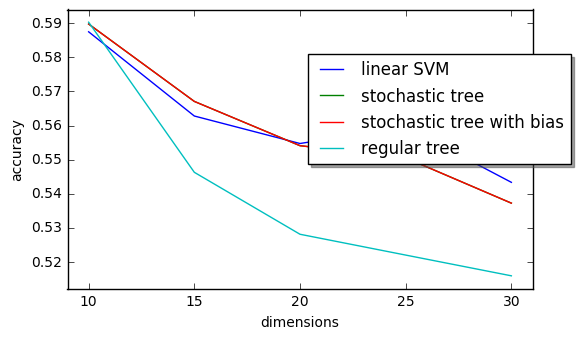

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# ax.plot(d_range,[maj[m].mean() for m in d_range], label = 'majority')
ax.plot(d_range,[svm_scores_means[m].mean() for m in d_range], label = 'linear SVM')
ax.plot(d_range,[stochastic_scores_means[m].mean() for m in d_range], label = 'stochastic tree')
ax.plot(d_range,[stochastic_bias_scores_means[m].mean() for m in d_range], label = 'stochastic tree with bias')
ax.plot(d_range,[tree_scores_means[m].mean() for m in d_range], label = 'regular tree')

ax.margins(0.05) # 5% padding in all directions
# legend = ax.legend(lbbox_to_anchor=(1.1, 1.05), shadow=True)

ax.set_xlabel('dimensions')
ax.set_ylabel('accuracy')

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.8, 0.87),
          fancybox=False, shadow=True, ncol=1)

plt.show()
# fig.savefig(r'c:\temp\multi-dim-xor-simulation.pdf')

In [10]:
# tree_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3), X, y, cv=5)
# print "regular"
# print tree_scores.mean()

In [11]:
# gaus_scores = cross_val_score(svm.SVC(kernel='rbf', gamma=2), X, y, cv=5)
# print "gauss"
# print gaus_scores.mean()